# Coursework Project 
## DATA71011 Understanding Data and their Environment

### Lime Team

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Understanding Data and their Environment/Assignment 2/final-data/final-trainData.csv')

/var/folders/9q/x_qkm_295r77cyh7zn22pj3h0000gn/T/ipykernel_3493/120311274.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Understanding Data and their Environment/Assignment 2/final-data/final-trainData.csv')


#### Data preparation

In [5]:
columns_to_drop = ['Date','CompetitionOpenDate','PromoDate']
# Drop the columns
salesFINAL = data.drop(columns=columns_to_drop)

# Display the cleaned DataFrame summary
salesFINAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   Store                1017209 non-null  int64 
 1   DayOfWeek            1017209 non-null  object
 2   Sales                1017209 non-null  int64 
 3   Customers            1017209 non-null  int64 
 4   Open                 1017209 non-null  int64 
 5   Promo                1017209 non-null  int64 
 6   StateHoliday         31050 non-null    object
 7   SchoolHoliday        1017209 non-null  int64 
 8   StoreType            1017209 non-null  object
 9   Assortment           1017209 non-null  object
 10  CompetitionDistance  1017209 non-null  int64 
 11  Promo2               1017209 non-null  int64 
 12  DiffTimeMonths       1017209 non-null  int64 
 13  DiffPromoTimeMonths  1017209 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 108.6+ MB


In [7]:
salesFINAL = salesFINAL[salesFINAL['Open'] == 1]

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Transform the 'StateHoliday' column
salesFINAL['StateHoliday_encoded'] = label_encoder.fit_transform(salesFINAL['StateHoliday'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Christmas': 0, 'Easter Holiday': 1, 'Public Holiday': 2, nan: 3}


In [11]:
# Transform the 'StoreType' column
salesFINAL['StoreType_encoded'] = label_encoder.fit_transform(salesFINAL['StoreType'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Type A': 0, 'Type B': 1, 'Type C': 2, 'Type D': 3}


In [13]:
# Transform the 'Assortment' column
salesFINAL['Assortment_encoded'] = label_encoder.fit_transform(salesFINAL['Assortment'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Basic': 0, 'Extended': 1, 'Extra': 2}


In [15]:
# Transform the 'DayOfWeek' column
salesFINAL['DayOfWeek_encoded'] = label_encoder.fit_transform(salesFINAL['DayOfWeek'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}


In [17]:
salesFINAL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017207
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Store                 844392 non-null  int64 
 1   DayOfWeek             844392 non-null  object
 2   Sales                 844392 non-null  int64 
 3   Customers             844392 non-null  int64 
 4   Open                  844392 non-null  int64 
 5   Promo                 844392 non-null  int64 
 6   StateHoliday          910 non-null     object
 7   SchoolHoliday         844392 non-null  int64 
 8   StoreType             844392 non-null  object
 9   Assortment            844392 non-null  object
 10  CompetitionDistance   844392 non-null  int64 
 11  Promo2                844392 non-null  int64 
 12  DiffTimeMonths        844392 non-null  int64 
 13  DiffPromoTimeMonths   844392 non-null  int64 
 14  StateHoliday_encoded  844392 non-null  int64 
 15  StoreType_encoded    

In [19]:
columns_drop = [
    'Store', 'StoreType', 'Assortment', 
    'StateHoliday','DayOfWeek','Customers',
    'Open'
]
# Drop the columns
dataFOREST = salesFINAL.drop(columns=columns_drop)
dataFOREST.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017207
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Sales                 844392 non-null  int64
 1   Promo                 844392 non-null  int64
 2   SchoolHoliday         844392 non-null  int64
 3   CompetitionDistance   844392 non-null  int64
 4   Promo2                844392 non-null  int64
 5   DiffTimeMonths        844392 non-null  int64
 6   DiffPromoTimeMonths   844392 non-null  int64
 7   StateHoliday_encoded  844392 non-null  int64
 8   StoreType_encoded     844392 non-null  int64
 9   Assortment_encoded    844392 non-null  int64
 10  DayOfWeek_encoded     844392 non-null  int64
dtypes: int64(11)
memory usage: 77.3 MB


In [21]:
# Check for missing values in a specific column (e.g., 'DiffPromoTimeMonths')
missing_values = dataFOREST['DiffPromoTimeMonths'].isnull()
num_missing = missing_values.sum()
print(f"Number of missing values in 'DiffPromoTimeMonths': {num_missing}")

Number of missing values in 'DiffPromoTimeMonths': 0


In [23]:
dataFOREST.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017207
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Sales                 844392 non-null  int64
 1   Promo                 844392 non-null  int64
 2   SchoolHoliday         844392 non-null  int64
 3   CompetitionDistance   844392 non-null  int64
 4   Promo2                844392 non-null  int64
 5   DiffTimeMonths        844392 non-null  int64
 6   DiffPromoTimeMonths   844392 non-null  int64
 7   StateHoliday_encoded  844392 non-null  int64
 8   StoreType_encoded     844392 non-null  int64
 9   Assortment_encoded    844392 non-null  int64
 10  DayOfWeek_encoded     844392 non-null  int64
dtypes: int64(11)
memory usage: 77.3 MB


#### Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into features (X) and target (y)
X = dataFOREST.drop(columns=['Sales'])  # Features
y = dataFOREST['Sales']  # Target

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit the model
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [27]:
# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

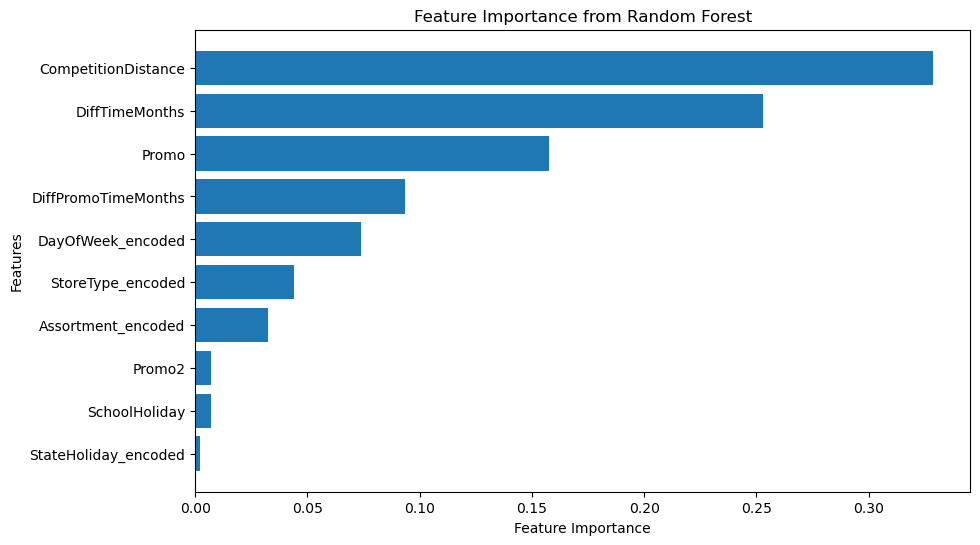

                Feature  Importance
2   CompetitionDistance    0.328755
4        DiffTimeMonths    0.253035
0                 Promo    0.157771
5   DiffPromoTimeMonths    0.093562
9     DayOfWeek_encoded    0.074077
7     StoreType_encoded    0.044199
8    Assortment_encoded    0.032419
3                Promo2    0.007116
1         SchoolHoliday    0.007042
6  StateHoliday_encoded    0.002024


In [29]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

# Display the ranked features
print(feature_importances)